# Generalized Linear Modeling (using reduced data sets)

- - -

<p><a name="home"></a></p>
## SECTIONS:
1. <a href="#overview">Initializing</a><br>
2. <a href="#ridge">Penalized Regression: RIDGE</a><br>
3. <a href="#lasso">Penalized Regrssion: LASSO</a><br>
4. <a href="#elastic">ELASTIC NET</a><br>

- - -

<p><a name="overview"></a></p>
## 1. Initializing:
<a href="#home">BACK TO THE TOP</a>

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

### Loading Data:

In [40]:
# Load train dataset
df_train = pd.read_csv('./train.csv')
df_test2 = pd.read_csv('./test.csv')

In [41]:
# Drop ID Column
df_train = df_train.drop(columns=['id'])
df_test = df_test2.drop(columns=['id'])
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

**Cleaning imported .csv(s):**

In [42]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

In [43]:
df = pd.get_dummies(df,drop_first=True)
train = df[df['section_Train'] == 1].drop(columns=['section_Train'])
test = df[df['section_Train'] == 0].drop(columns=['section_Train'])
testPredict = test.drop('price', axis=1)
testPredict.shape
X = train.drop(columns=['price'])
y = train['price']

In [46]:
X.shape

(22730, 16)

### Generating Training and Validation subsets (from training set):

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
len(y_test)

4546

**Creating log values of dependent variable (SalePrice):**

In [48]:
y_log = np.log(y)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Initializing Model Objects:

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge   = Ridge()
lasso   = Lasso()
elastic = ElasticNet()

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV

- - -

<p><a name="ridge"></a></p>
## 2. Penalized Regression: RIDGE
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha):**

In [51]:
ridge_alpharange = np.linspace(0.001,40, 1000)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

In [52]:
ridge_scores_train = []
ridge_scores_test  = []
ridge_coefs        = []

**Iterating through previously selected grid of lambda values:**

In [53]:
for alpha in ridge_alpharange:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train_log)
    ridge_scores_train.append(ridge.score(X_train, y_train_log))
    ridge_scores_test.append(ridge.score(X_test, y_test_log))
    ridge_coefs.append(ridge.coef_)

**Creating arrays of score and coefficient lists:**

In [54]:
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test  = np.array(ridge_scores_test)
ridge_coefs        = np.array(ridge_coefs)

**Visually comparing $R^2$ values of models per Lambda values:**

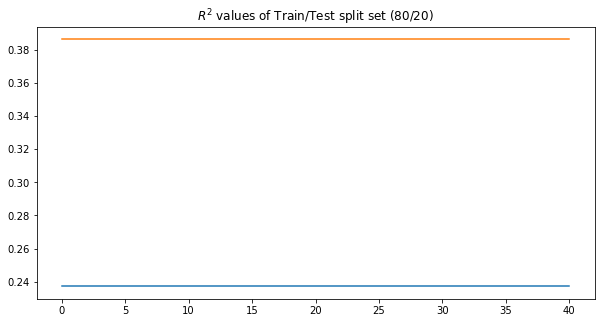

In [55]:
plt.figure(figsize=(10,5))
plt.plot(ridge_alpharange, ridge_scores_train)
plt.plot(ridge_alpharange, ridge_scores_test)
plt.title('$R^2$ values of Train/Test split set (80/20)')
plt.show()

**Visualizing Coefficients being penalized by Lambda Values:**

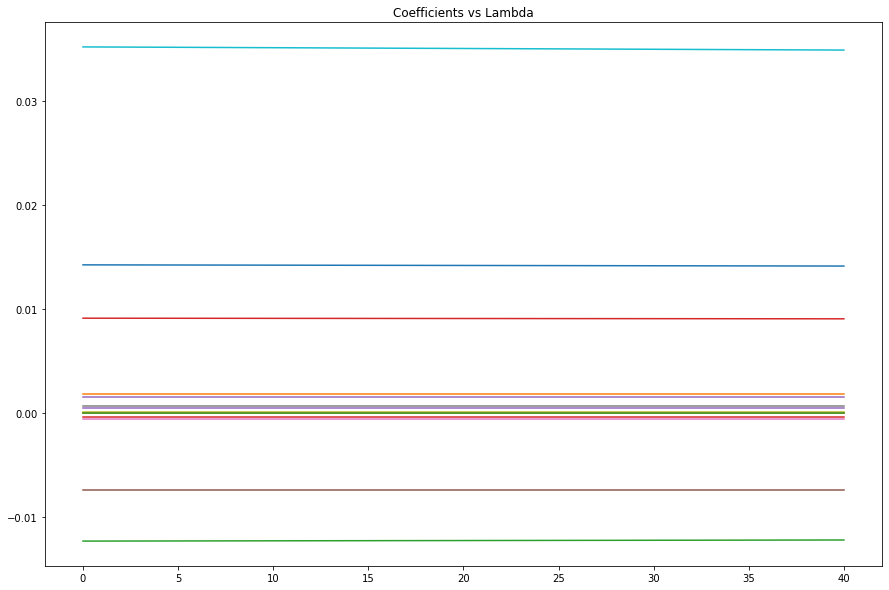

In [56]:
plt.figure(figsize=(15,10))
plt.plot(ridge_alpharange, ridge_coefs)
plt.title('Coefficients vs Lambda')
plt.show()

**Using complete training set (no split) to train model using GridSearchCV function:**

In [57]:
gsridge = GridSearchCV(ridge, {"alpha":ridge_alpharange}, scoring='r2')
gsridge.fit(X, y_log)

GridSearchCV(estimator=Ridge(alpha=40.0),
             param_grid={'alpha': array([1.00000000e-03, 4.10390390e-02, 8.10780781e-02, 1.21117117e-01,
       1.61156156e-01, 2.01195195e-01, 2.41234234e-01, 2.81273273e-01,
       3.21312312e-01, 3.61351351e-01, 4.01390390e-01, 4.41429429e-01,
       4.81468468e-01, 5.21507508e-01, 5.61546547e-01, 6.01585586e-01,
       6.41624625e-01, 6.81663664e-01, 7.21702703e-...
       3.90791021e+01, 3.91191411e+01, 3.91591802e+01, 3.91992192e+01,
       3.92392583e+01, 3.92792973e+01, 3.93193363e+01, 3.93593754e+01,
       3.93994144e+01, 3.94394535e+01, 3.94794925e+01, 3.95195315e+01,
       3.95595706e+01, 3.95996096e+01, 3.96396486e+01, 3.96796877e+01,
       3.97197267e+01, 3.97597658e+01, 3.97998048e+01, 3.98398438e+01,
       3.98798829e+01, 3.99199219e+01, 3.99599610e+01, 4.00000000e+01])},
             scoring='r2')

In [58]:
gsridge.best_params_

{'alpha': 40.0}

In [59]:
gsridge.best_score_

-0.9090971435235071

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [86]:
ridge.set_params(alpha = gsridge.best_params_)
print(ridge)

Ridge(alpha={'alpha': 40.0})


**Printing .csv:**

In [91]:
# Reduce the length of the index by one
adjusted_index = testID['id'][1:]

# Convert the predicted values to a DataFrame with the adjusted index
gs_ridge_min_predict = pd.DataFrame({'price': np.exp(ridge.predict(XPredict)).flatten()}, index=adjusted_index)

# Save the DataFrame to a CSV file
gs_ridge_min_predict.to_csv('./kaggle_submissions/gs_ridge_predict.csv')


- - -

<p><a name="lasso"></a></p>
## 3. Penalized Regrssion: LASSO
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha):**

In [65]:
lasso_alpharange = np.linspace(0.0001,0.1,1000)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

In [66]:
lasso_scores_train = []
lasso_scores_test  = []
lasso_coefs        = []

**Iterating through previously selected grid of lambda values:**

In [67]:
for alpha in lasso_alpharange:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train_log)
    lasso_scores_train.append(lasso.score(X_train, y_train_log))
    lasso_scores_test.append(lasso.score(X_test, y_test_log))
    lasso_coefs.append(lasso.coef_)

**Creating arrays of score and coefficient lists:**

In [68]:
lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test  = np.array(lasso_scores_test)
lasso_coefs        = np.array(lasso_coefs)

**Visually comparing $R^2$ values of models per Lambda values:**

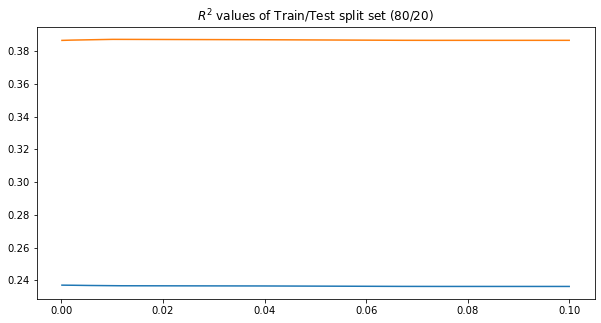

In [69]:
plt.figure(figsize=(10,5))
plt.plot(lasso_alpharange, lasso_scores_train)
plt.plot(lasso_alpharange, lasso_scores_test)
plt.title('$R^2$ values of Train/Test split set (80/20)')
plt.show()

**Visualizing Coefficients being penalized by Lambda Values:**

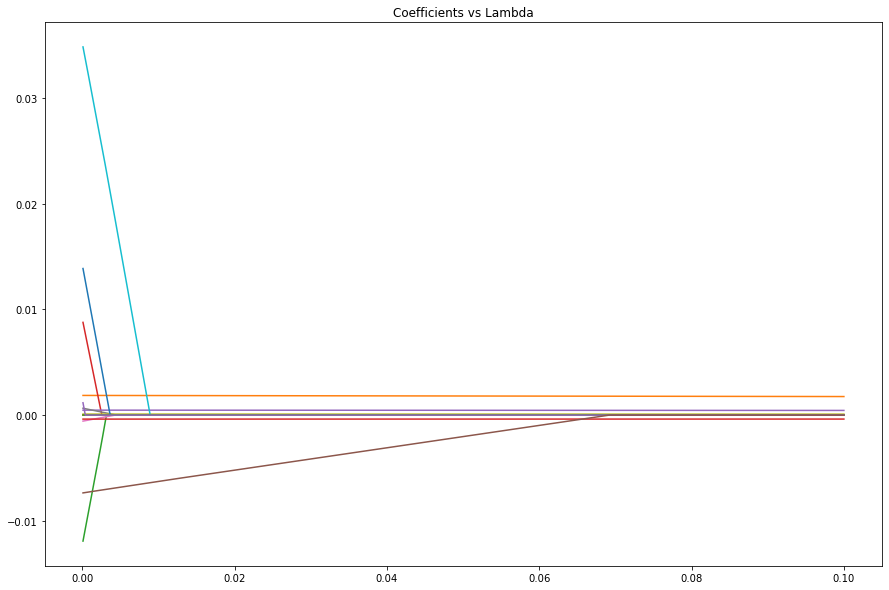

In [70]:
plt.figure(figsize=(15,10))
plt.plot(lasso_alpharange, lasso_coefs)
plt.title('Coefficients vs Lambda')
plt.show()

**Using complete training set (no split) to train model using GridSearchCV function:**

In [71]:
gslasso = GridSearchCV(lasso, {"alpha":lasso_alpharange}, scoring='r2')
gslasso.fit(X, y_log)

GridSearchCV(estimator=Lasso(alpha=0.1),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041,...
       0.0945, 0.0946, 0.0947, 0.0948, 0.0949, 0.095 , 0.0951, 0.0952,
       0.0953, 0.0954, 0.0955, 0.0956, 0.0957, 0.0958, 0.0959, 0.096 ,
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ])},
             scoring='r2')

In [72]:
gslasso.best_params_

{'alpha': 0.1}

In [73]:
gslasso.best_score_

-0.9070411838277244

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [74]:
lasso.set_params(alpha = gslasso.best_params_)
print(lasso)

Lasso(alpha={'alpha': 0.1})


**Printing .csv :**

In [101]:
# Reduce the length of the index by one
adjusted_index = testID['id'][1:]

gs_lasso_min_predict         = pd.DataFrame(np.exp(lasso.predict(XPredict)), index = adjusted_index)
gs_lasso_min_predict.columns = ['price']
gs_lasso_min_predict.to_csv('./kaggle_submissions/gs_lasso_predict.csv')

- - -

<p><a name="elastic"></a></p>
## 4. ELASTIC NET
<a href="#home">BACK TO THE TOP</a>

**Setting a range of penalty hyperparameter, lambda (alpha) & tuning hyperparameter, rho(l1_ratio):**

In [93]:
elastic_alpharange = np.logspace(-4,2,1000)
rhorange         = np.linspace(0.5, 0.99, 10)

**Creating empty lists to append scores and coefficients per iteration over lambda:**

**Using complete training set (no split) to train model using GridSearchCV function:**

In [94]:
elasticCV = ElasticNetCV(alphas = elastic_alpharange, l1_ratio = rhorange)
elasticCV.fit(X, y_log)

ElasticNetCV(alphas=array([1.00000000e-04, 1.01392541e-04, 1.02804473e-04, 1.04236067e-04,
       1.05687597e-04, 1.07159340e-04, 1.08651577e-04, 1.10164595e-04,
       1.11698682e-04, 1.13254132e-04, 1.14831241e-04, 1.16430313e-04,
       1.18051653e-04, 1.19695570e-04, 1.21362380e-04, 1.23052400e-04,
       1.24765955e-04, 1.26503372e-04, 1.28264983e-04, 1.30051125e-04,
       1.31862140e-04, 1.336983...
       8.12661920e+01, 8.23978568e+01, 8.35452806e+01, 8.47086827e+01,
       8.58882856e+01, 8.70843150e+01, 8.82969996e+01, 8.95265713e+01,
       9.07732653e+01, 9.20373200e+01, 9.33189772e+01, 9.46184819e+01,
       9.59360829e+01, 9.72720319e+01, 9.86265846e+01, 1.00000000e+02]),
             l1_ratio=array([0.5       , 0.55444444, 0.60888889, 0.66333333, 0.71777778,
       0.77222222, 0.82666667, 0.88111111, 0.93555556, 0.99      ]))

In [95]:
elasticCV.alpha_

1.3369837418249453

In [96]:
elasticCV.l1_ratio_

0.5

In [97]:
# list(elasticCV.alphas_).index(0.0006120498372476703)
# np.mean(elasticCV.mse_path_[-1,:,:], axis=1).shape

**Using best Lambda produced above to predict SalePrice values on test data set:**

In [98]:
elasticCV.set_params(alphas = elasticCV.alpha_, l1_ratio = elasticCV.l1_ratio_)
print(elasticCV)

ElasticNetCV(alphas=1.3369837418249453)


**Printing .csv:**

In [100]:
# Reduce the length of the index by one
adjusted_index = testID['id'][1:]

elasticCV_min_predict         = pd.DataFrame(np.exp(elasticCV.predict(XPredict)), index = adjusted_index)
elasticCV_min_predict.columns = ['price']
elasticCV_min_predict.to_csv('./kaggle_submissions/elasticCV_predict.csv')

In [3]:
import pandas as pd

# List of file paths
file_paths = ['./kaggle_submissions/gs_ridge_predict.csv', './kaggle_submissions/gs_lasso_predict.csv', './kaggle_submissions/elasticCV_predict.csv']

# Initialize an empty dictionary to store price values for each ID
price_dict = {}

# Read and process each file
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Iterate over each row and calculate the average price for each ID
    for _, row in df.iterrows():
        id_value = row['id']
        price_value = row['price']
        
        if id_value in price_dict:
            price_dict[id_value].append(price_value)
        else:
            price_dict[id_value] = [price_value]

# Calculate the average price for each ID
average_prices = []
for id_value, prices in price_dict.items():
    average_price = sum(prices) / len(prices)
    average_prices.append(average_price)

# Print the average prices
print(len(average_prices))

15154


- - -